In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = iris["data"][:, 3:] #petal width array
y = (iris["target"] == 2).astype(np.int)

In [3]:
#train the model
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

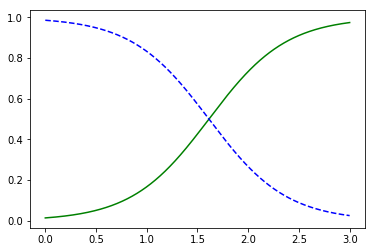

In [4]:
#probability of flowers with petal wings varying from 0 to 3
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

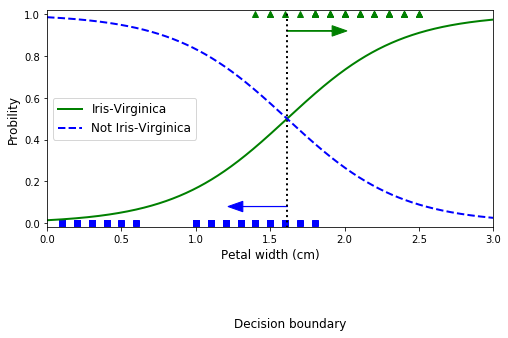

In [5]:
X_new == np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]

plt.figure(figsize=(8,4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary],[-1,2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02,-0.5, "Decision boundary", fontsize=12, color="k", ha="center")
plt.arrow(decision_boundary,0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary,0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probility", fontsize=12)
plt.legend(loc="center left", fontsize=12)
plt.axis([0,3,-0.02,1.02])
plt.show()

In [6]:
decision_boundary

array([1.61561562])

In [10]:
#do the exercise
size_array = [[4.8],[2.5],[5.3],[2.4]]
prob_by_size = log_reg.predict_proba(a)

print("Petal Size : Given probability, if it's an Iris-Virginica")
for i, row in enumerate(prob_by_size): print(size_array[i], "     : ", '%.8f'%row[1])

Petal Size : Given probability, if it's an Iris-Virginica
[4.8]      :  0.99976219
[2.5]      :  0.91073478
[5.3]      :  0.99993575
[2.4]      :  0.88703942
